In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\garik\Downloads\Housing.csv")  # Use raw string to avoid Unicode errors
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Step 3: Explore Dataset
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
# Step 4: Drop missing or empty values
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)


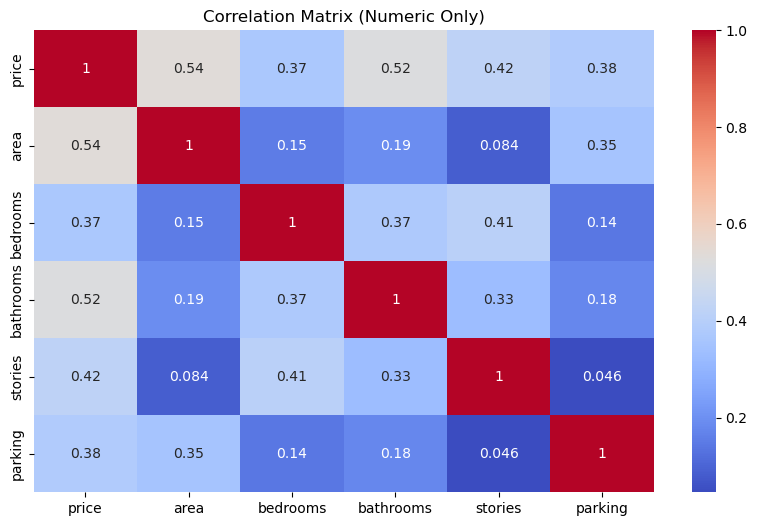

In [6]:
# Step 5: Visualize Correlation (Only Numeric Columns)
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number])  # Only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Only)")
plt.show()


In [7]:
# Step 6: Simple Linear Regression (Area vs Price)
X_simple = df[['area']]
y = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)


In [8]:
# Step 7: Evaluation - Simple Regression
print("Simple Linear Regression Evaluation")
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R² Score:", r2_score(y_test_s, y_pred_s))


Simple Linear Regression Evaluation
MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644


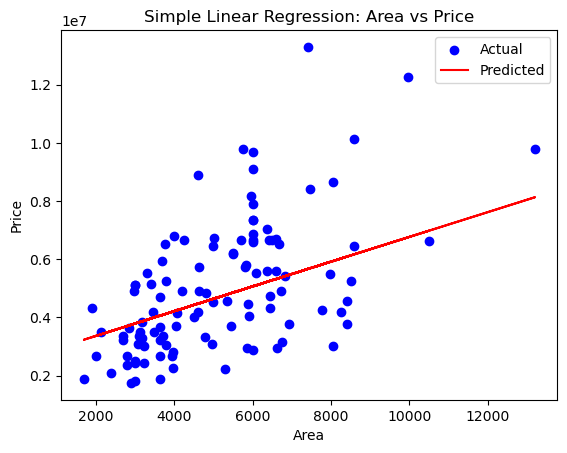

In [9]:
# Step 8: Plot Simple Regression Line
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()


In [10]:
# Step 9: Multiple Linear Regression
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_multi = df[features]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)


In [11]:
# Step 10: Evaluation - Multiple Regression
print("Multiple Linear Regression Evaluation")
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))


Multiple Linear Regression Evaluation
MAE: 1127483.3523235186
MSE: 2292721545725.361
R² Score: 0.5464062355495873


In [12]:
# Step 11: Coefficient Interpretation
print("Model Coefficients:")
for feature, coef in zip(features, model_multi.coef_):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {model_multi.intercept_:.2f}")


Model Coefficients:
area: 308.87
bedrooms: 151246.75
bathrooms: 1185731.71
stories: 495100.76
parking: 337660.83
Intercept: 51999.68
